In [200]:
import matplotlib.pyplot as plt
import math
import random


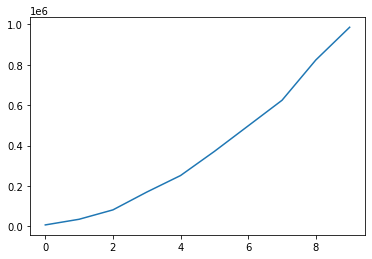

In [201]:
plt.plot(stakers)

[10000, 40000, 90000, 160000, 250000, 360000, 490000, 640000, 810000, 1000000]
3850000
[6878, 36768, 87353, 164134, 246934, 360518, 501215, 649259, 811112, 985826]
3849997
0.6878
0.9192
0.9705888888888888
1.0258375
0.987736
1.001438888888889
1.0228877551020408
1.0144671875
1.0013728395061727
0.985826


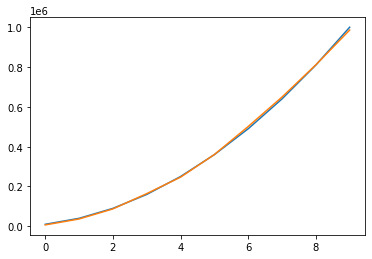

In [202]:
stakers=[]
for i in range(1,11):
    stakers.append(10000*i*i)
    
print(stakers)
stakersBefore = stakers.copy()
print(sum(stakers))

plt.plot(stakers)
epochs=100000
exposure=1000
minStake=1000
chancePenalty=0.01

rewardPool=0
    

for e in range(epochs):
    stakeGettingReward=0
    stakersGettingReward=[]
    for i in range(len(stakers)):
        if(random.random()<chancePenalty):
            penalty = math.floor(stakers[i]/exposure)
            stakers[i]-=penalty
            rewardPool+=penalty
        stakeGettingReward+=stakers[i]
#     print("rewardPool",rewardPool)
#     print("stakeGettingReward",stakeGettingReward)
#     print("stakersGettingReward",stakersGettingReward)
    
    rewardPool
    rewardLeft=rewardPool
    for j in range(len(stakers)):
        reward = (stakers[j]*rewardPool)/stakeGettingReward
#         print("reward",reward)
        reward = math.floor(reward)
        #print("reward",reward)

        stakers[j]+=reward
        rewardLeft=rewardLeft-reward
    rewardPool=rewardLeft
#     print(stakers)

print(stakers)

print(sum(stakers))
plt.plot((stakers))
#     print("rewardLeft",rewardLeft)

for i in range(len(stakers)):
    print(stakers[i]/stakersBefore[i])